<a href="https://colab.research.google.com/github/OKleg/CV_lab2/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
def loading(path):
    return cv2.imread(path,cv2.IMREAD_COLOR)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def correctByColor(path,Rd,Gd,Bd,Rs,Gs,Bs):
  img = loading(path)
  res = img.astype(np.float64)
  res[:,:,2] *= Rd/Rs
  res[:,:,1] *= Gd/Gs
  res[:,:,0] *= Bd/Bs

  return res.astype(np.uint8)

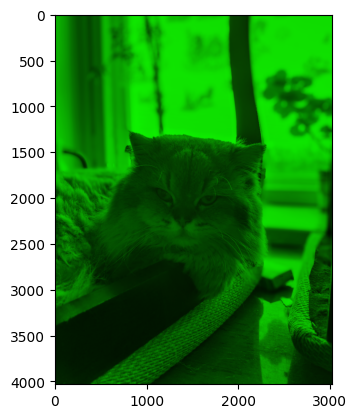

In [ ]:
res = correctByColor("pict.jpg",1,240,16,255,255,255)
plt.imshow(res)

In [ ]:
def grayWorld(path):
  img = loading(path)
  res = img.astype(np.float64)
  w = res.shape[0]
  h = res.shape[1]
  N = w*h
  avgR = np.sum(res[:,:,2])/N
  avgG = np.sum(res[:,:,1])/N
  avgB = np.sum(res[:,:,0])/N
  avg = (avgR + avgG + avgB) / 3
  res[:,:,2]*= avgR/avg
  res[:,:,1]*= avgG/avg
  res[:,:,0]*= avgB/avg
  return res.astype(np.uint8)

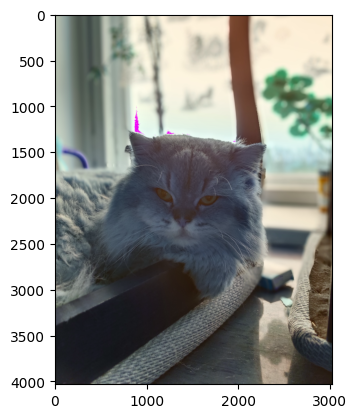

In [ ]:
plt.imshow(grayWorld("pict.jpg"))

In [ ]:

def lin(path):
  img = loading(path)
  res = img.astype(np.float64)

  maxR = np.max(res[:,:,2])
  maxG = np.max(res[:,:,1])
  maxB = np.max(res[:,:,0])

  minR = np.min(res[:,:,2])
  minG = np.min(res[:,:,1])
  minB = np.min(res[:,:,0])

  res[:,:,2] -= (minR)
  res[:,:,2]*=(255-0)/(maxR-minR)
  res[:,:,1] -= (minG)
  res[:,:,1] *=(255-0)/(maxG-minG)
  res[:,:,0] -= (minB)
  res[:,:,0] *=(255-0)/(maxB-minB)

  return res.astype(np.uint8)

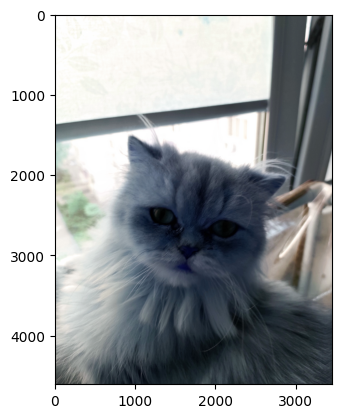

In [ ]:
plt.imshow(lin("pict.jpg"))

In [ ]:

def sqrtfunc(path):
  img = loading(path)
  res = img.astype(np.float64)
  res /= 255
  res[:,:,2] = np.power(res[:,:,2],0.5)
  res[:,:,1] = np.power(res[:,:,1],0.5)
  res[:,:,0] = np.power(res[:,:,0],0.5)
  res*=255
  np.clip(res, a_min=0, a_max=255)
  return res.astype(np.uint8)

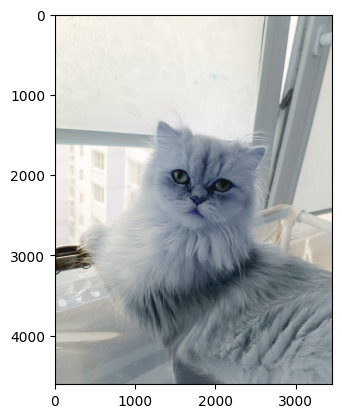

In [ ]:
plt.imshow(sqrtfunc("pict.jpg"))

In [ ]:
def pow3func(path):
  img = loading(path)
  res = img.astype(np.float64)
  res /= 255
  res[:,:,2] = np.power(res[:,:,2],3)
  res[:,:,1] = np.power(res[:,:,1],3)
  res[:,:,0] = np.power(res[:,:,0],3)
  res*=255
  np.clip(res, a_min=0, a_max=255)
  return res.astype(np.uint8)

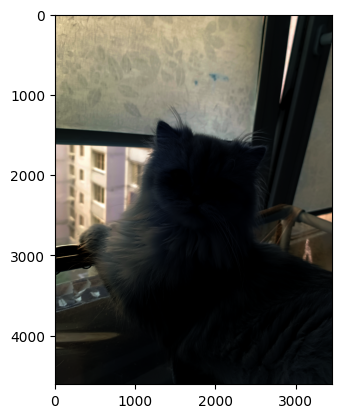

In [ ]:
plt.imshow(pow3func("pict.jpg"))

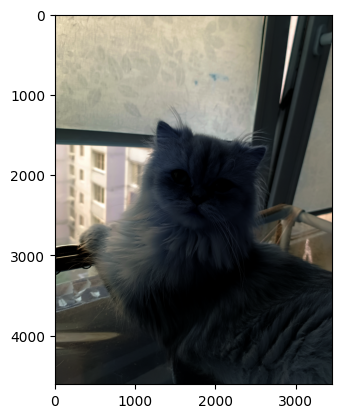

In [ ]:
def pow2func(path):
  img = loading(path)
  res = img.astype(np.float64)
  res /= 255
  res[:,:,2] = np.power(res[:,:,2],2)
  res[:,:,1] = np.power(res[:,:,1],2)
  res[:,:,0] = np.power(res[:,:,0],2)
  res*=255
  np.clip(res, a_min=0, a_max=255)
  return res.astype(np.uint8)
plt.imshow(pow2func("pict.jpg"))

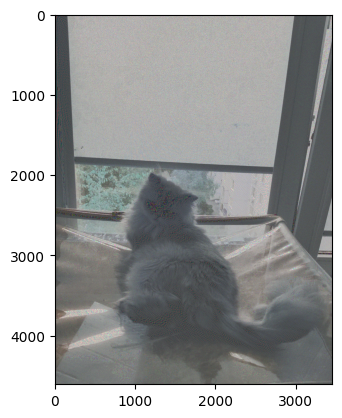

In [ ]:
def hist(path):
  img = loading(path)
  res = img.astype(np.float64)
  flag = False
  for row in range(1,res.shape[0]):
   for col in range(1,res.shape[1]):
     if (flag):
       flag = False
       continue
     res[row][col] += res[row-1][col-1]

     flag = True

  plt.imshow(res.astype(np.uint8))
hist("pict.jpg")